
Field data inversion ("SeisGilpin2019")
----------------------------------

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))

In [2]:
import pygimli as pg
from pygimli.physics import Refraction

In [25]:
%matplotlib notebook
import matplotlib

In [3]:
%cd "/data/Classes/FieldWorkGeophys/SupportMaterial"

/data/Classes/FieldWorkGeophys/SupportMaterial


In [23]:
filename='./SeisHoughall2016-Copy1.sgt'

In [29]:
ra = Refraction(filename)
print(ra)

Data: Sensors: 33 data: 168
Refraction object
Data: Sensors: 33 data: 168
None


Let's have a look at the data in the form of traveltime curves and apparent
velocity images.



<IPython.core.display.Javascript object>


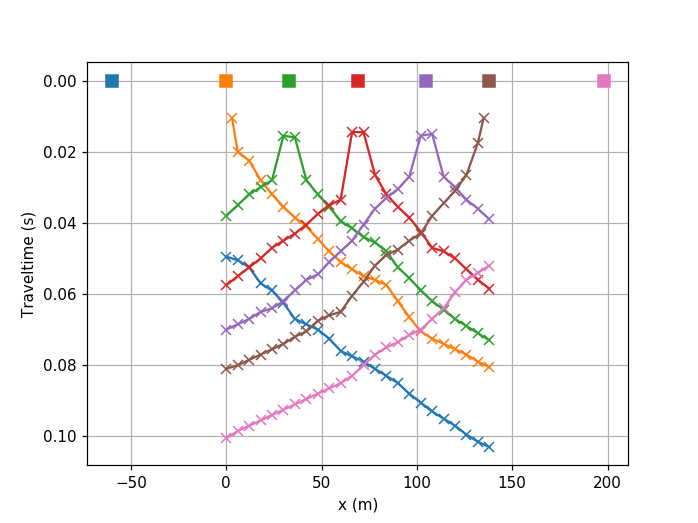

In [30]:
ra.showData()  # show first arrivals as curves (done later with response)
#ra.showVA()  # show data as apparent velocity image

Finally, we call the `invert` method and plot the result.The mesh is created
based on the sensor positions on-the-fly. Yes, it is really as simple as that.



In [118]:
#ra.createMesh(quality=25,area=0.25, depth=3., paraMaxCellSize=5.0, secNodes=1)
ra = Refraction(filename)
ra.createMesh(quality=24,paraMaxCellSize=6.0)#,depth=50)
ra.invert(zWeight=0.95,maxIter=5)#,depth=40.0)

Data: Sensors: 33 data: 168


<IPython.core.display.Javascript object>


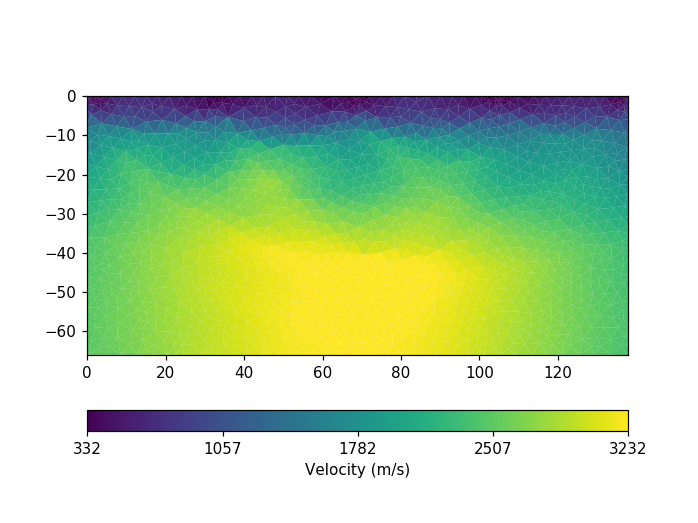

(0, 138)

In [47]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ra.showResult(ax=ax)
ax.set_xlim(0,138)

In [51]:
fig.savefig("Houghall-2016.pdf")

In [119]:
ra.showResultAndFit()
fig=plt.gcf();
#fig.axes[0].set_xlim(0,138)
fig.axes[0].axvspan(-60,0, alpha=0.5, color='white')
fig.axes[0].axvspan(138,198, alpha=0.5, color='white')
fig.axes[0].get_shared_x_axes().join(fig.axes[0], fig.axes[1])
#fig.axes[0].set_xticklabels([])
fig.axes[1].autoscale()
plt.tight_layout()

#


<IPython.core.display.Javascript object>

In [60]:
fig.savefig("Houghall-2016_fit.pdf")

You can play around with the gradient starting model (`vtop` and `vbottom`
arguments) and the regularization strength `lam`. You can also customize the
mesh by calling `ra.createMesh()` with options of your choice prior to the
inversion call.



### make the inversion more sensitive to superficial layers (zWeight):

In [124]:
#ra.createMesh(quality=25,area=0.25, depth=3., paraMaxCellSize=5.0, secNodes=1)
ra = Refraction(filename)
ra.createMesh(quality=24,paraMaxCellSize=10.0)#,depth=50)
ra.invert(zWeight=0.1,maxIter=5)#,depth=40.0)

Data: Sensors: 33 data: 168


In [126]:
#plt.rcParams['sharex']=True
ra.showResultAndFit()
fig=plt.gcf();
#fig.axes[0].set_xlim(0,138)
fig.axes[0].axvspan(-60,0, alpha=0.5, color='white')
fig.axes[0].axvspan(138,198, alpha=0.5, color='white')
fig.axes[0].get_shared_x_axes().join(fig.axes[0], fig.axes[1])
#fig.axes[0].set_xticklabels([])
fig.axes[1].autoscale()
plt.tight_layout()
#


<IPython.core.display.Javascript object>

In [73]:
ra = Refraction(filename)
ra.invert(zWeight=0.95,maxIter=5,depth=40.0)

Data: Sensors: 33 data: 168


In [74]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ra.showResult(ax=ax)
ax.set_xlim(0,138)

<IPython.core.display.Javascript object>

(0, 138)